In [4]:
%matplotlib inline
from mocpy import MOC
from astropy.io import fits
import numpy as np

In [5]:
image_path = 'demo-data/image_with_mask.fits.gz'

with fits.open(image_path) as hdulist:
    moc = MOC.from_image(header=hdulist[0].header,
                         max_norder=10,
                         mask_arr=hdulist[0].data)

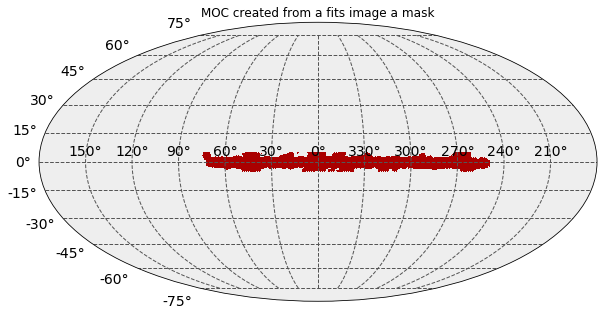

In [6]:
from astropy.coordinates import Galactic
moc.plot(title="MOC created from a fits image a mask", frame=Galactic())